In [1]:
# Analysis of Economic Time Series (Python)

# prepare for Python version 3x features and functions
from __future__ import division, print_function

In [2]:
# import packages for time series analysis and modeling
import pandas as pd  # data structures for time series analysis
import datetime  # date manipulation
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA  # time series modeling
from statsmodels.tsa.stattools import grangercausalitytests as granger

In [3]:
# additional time series functions available in R
# from rpy2.robjects import r  # interface from Python to R

# Economic time series were originally obtained from
# the Federal Reserve Bank of St. Louis (FRED system).
#
# National Civilian Unemployment Rate (monthly, percentage)
#     converted to the employment rate ER = 100 - UNRATENSA
#
# Manufacturers' New Orders: Durable Goods (millions of dollars) 
#     DGO = DGORDER/1000 expressed in  billions of dollars 
#
# University of Michigan Index of Consumer Sentiment (1Q 1966 = 100)
#     ICS = UMCSENT
#
# New Homes Sold in the US, not seasonally adjusted (monthly, millions)
#     NHS = HSN1FNSA   

# read data in from comma-delimited text files
ER_data_frame = pd.read_csv("FRED_ER_data.csv")
DGO_data_frame = pd.read_csv("FRED_DGO_data.csv")
ICS_data_frame = pd.read_csv("FRED_ICS_data.csv")
NHS_data_frame = pd.read_csv("FRED_NHS_data.csv")

In [4]:
# identify date fields as dates with apply and lambda function
ER_data_frame['date'] = \
    ER_data_frame['date']\
    .apply(lambda d: datetime.datetime.strptime(str(d), '%Y-%m-%d'))
DGO_data_frame['date'] = \
    DGO_data_frame['date']\
    .apply(lambda d: datetime.datetime.strptime(str(d), '%Y-%m-%d'))
ICS_data_frame['date'] = \
    ICS_data_frame['date']\
    .apply(lambda d: datetime.datetime.strptime(str(d), '%Y-%m-%d'))
NHS_data_frame['date'] = \
    NHS_data_frame['date']\
    .apply(lambda d: datetime.datetime.strptime(str(d), '%Y-%m-%d'))

In [5]:
# create data frames indexed by date
ER_data = ER_data_frame.set_index(['date']) 
DGO_data = DGO_data_frame.set_index(['date']) 
ICS_data = ICS_data_frame.set_index(['date']) 
NHS_data = NHS_data_frame.set_index(['date']) 

C:\Users\Smith\AppData\Local\Temp\ipykernel_20352\422075740.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('fig_ER_Python.pdf',
C:\Users\Smith\AppData\Local\Temp\ipykernel_20352\422075740.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('fig_ER_Python.pdf',


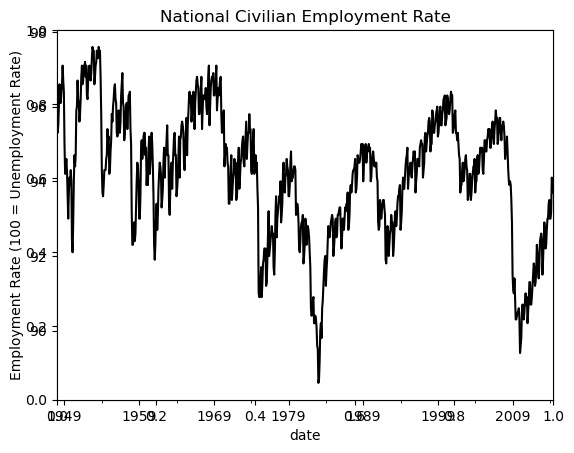

In [6]:
# plot the individual time series
# National Civilian Employment Rate
fig, axis = plt.subplots()
axis = fig.add_subplot(1, 1, 1)
axis.set_xlabel('Date')
axis.set_ylabel('Employment Rate (100 = Unemployment Rate)')
axis.set_title('National Civilian Employment Rate')
ER_data['ER'].plot(ax = axis, style = 'k-')
plt.savefig('fig_ER_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

C:\Users\Smith\AppData\Local\Temp\ipykernel_20352\3755957777.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('fig_DGO_Python.pdf',
C:\Users\Smith\AppData\Local\Temp\ipykernel_20352\3755957777.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('fig_DGO_Python.pdf',


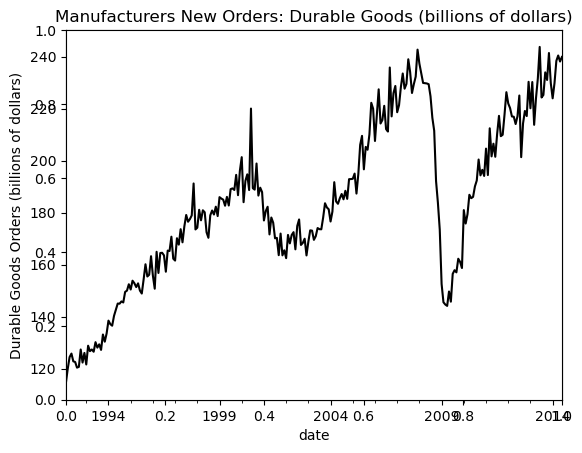

In [7]:
# Manufacturers New Orders: Durable Goods (billions of dollars) 
fig, axis = plt.subplots()
axis = fig.add_subplot(1, 1, 1)
axis.set_xlabel('Date')
axis.set_ylabel('Durable Goods Orders (billions of dollars)')
axis.set_title\
    ('Manufacturers New Orders: Durable Goods (billions of dollars)')
DGO_data['DGO'].plot(ax = axis, style = 'k-')
plt.savefig('fig_DGO_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

C:\Users\Smith\AppData\Local\Temp\ipykernel_20352\1238760688.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('fig_ICS_Python.pdf',
C:\Users\Smith\AppData\Local\Temp\ipykernel_20352\1238760688.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('fig_ICS_Python.pdf',


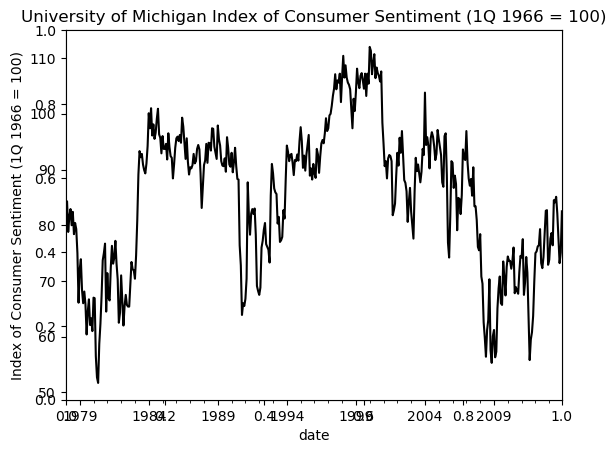

In [8]:
# University of Michigan Index of Consumer Sentiment (1Q 1966 = 100)
fig, axis = plt.subplots()
axis = fig.add_subplot(1, 1, 1)
axis.set_xlabel('Date')
axis.set_ylabel('Index of Consumer Sentiment (1Q 1966 = 100)')
axis.set_title\
    ('University of Michigan Index of Consumer Sentiment (1Q 1966 = 100)')
ICS_data['ICS'].plot(ax = axis, style = 'k-')
plt.savefig('fig_ICS_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

C:\Users\Smith\AppData\Local\Temp\ipykernel_20352\1231752784.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('fig_NHS_Python.pdf',
C:\Users\Smith\AppData\Local\Temp\ipykernel_20352\1231752784.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('fig_NHS_Python.pdf',


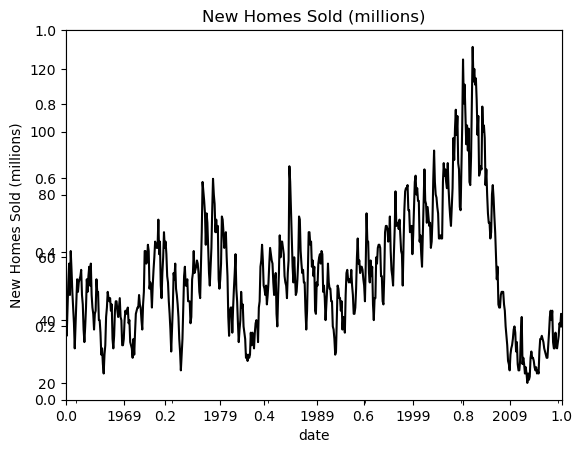

In [9]:
# New Homes Sold in the US, not seasonally adjusted (monthly, millions)
fig, axis = plt.subplots()
axis = fig.add_subplot(1, 1, 1)
axis.set_xlabel('Date')
axis.set_ylabel('New Homes Sold (millions)')
axis.set_title('New Homes Sold (millions)')
NHS_data['NHS'].plot(ax = axis, style = 'k-')
plt.savefig('fig_NHS_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

In [10]:
# merge the time series data frames
economic_mts = pd.merge(ER_data, DGO_data,\
    how = 'outer', left_index = True, right_index = True)
economic_mts = pd.merge(economic_mts, ICS_data,\
    how = 'outer', left_index = True, right_index = True)
economic_mts = pd.merge(economic_mts, NHS_data,\
    how = 'outer', left_index = True, right_index = True)
print(economic_mts.shape)

(798, 4)


In [11]:
# select dates with complete data on all four series
modeling_mts = economic_mts.dropna()
print(modeling_mts.head)

<bound method NDFrame.head of               ER      DGO   ICS   NHS
date                                 
1992-02-01  91.8  114.535  68.8  55.0
1992-03-01  92.2  120.025  76.0  56.0
1992-04-01  92.8  124.470  77.2  53.0
1992-05-01  92.7  125.822  79.2  52.0
1992-06-01  92.0  122.834  80.4  53.0
...          ...      ...   ...   ...
2013-08-01  92.7  225.292  82.1  31.0
2013-09-01  93.0  233.988  77.5  31.0
2013-10-01  93.0  231.075  73.2  36.0
2013-11-01  93.4  241.438  75.1  32.0
2013-12-01  93.5  229.813  82.5  31.0

[263 rows x 4 columns]>


In [12]:
# select time series for multiple time series plot
initial_plotting_mts = \
    pd.DataFrame(modeling_mts, columns = ["ER","DGO","ICS","NHS"])
print(initial_plotting_mts.head)

<bound method NDFrame.head of               ER      DGO   ICS   NHS
date                                 
1992-02-01  91.8  114.535  68.8  55.0
1992-03-01  92.2  120.025  76.0  56.0
1992-04-01  92.8  124.470  77.2  53.0
1992-05-01  92.7  125.822  79.2  52.0
1992-06-01  92.0  122.834  80.4  53.0
...          ...      ...   ...   ...
2013-08-01  92.7  225.292  82.1  31.0
2013-09-01  93.0  233.988  77.5  31.0
2013-10-01  93.0  231.075  73.2  36.0
2013-11-01  93.4  241.438  75.1  32.0
2013-12-01  93.5  229.813  82.5  31.0

[263 rows x 4 columns]>


AttributeError: 'DataFrame' object has no attribute 'ix'

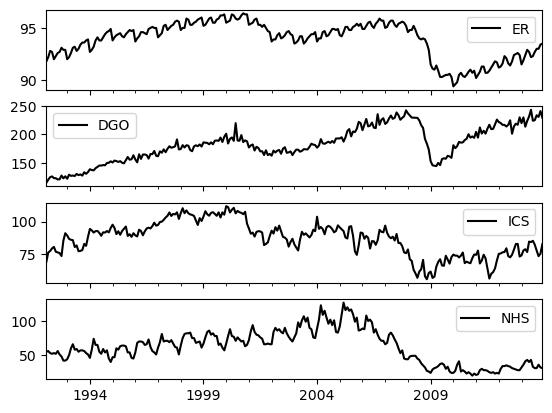

In [18]:
# create multiple time series plot
initial_plotting_mts.plot(subplots = True, style = 'k-', sharex = True,)
plt.legend(loc = 'best')
plt.xlabel('')

# using March 1997 as reference data 
#print(modeling_mts.ix['1997-03-01'])  # (ICS = 100 on this date)
# define indexing constants 
#indexing_constant = modeling_mts.ix['1997-03-01']
ER0 = indexing_constant['ER']
DGO0 = indexing_constant['DGO']
NHS0 = indexing_constant['NHS']

# compute indexed time series
modeling_mts['IER'] = \
    modeling_mts['ER'].apply(lambda d: (d/ER0) * 100) 
modeling_mts['IDGO'] = \
    modeling_mts['DGO'].apply(lambda d: (d/DGO0) * 100) 
modeling_mts['INHS'] = \
    modeling_mts['NHS'].apply(lambda d: (d/NHS0) * 100) 
